# PCA

## Task 1: Exploratory Data Analysis (EDA):
### 1.	Load the dataset and perform basic data exploration.
### 2.	Examine the distribution of features using histograms, box plots, or density plots.
### 3.	Investigate correlations between features to understand relationships within the data.


In [1]:
import pandas as pd

df = pd.read_csv('wine.csv')

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(None,
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
 0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
 1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
 2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
 3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
 4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   
 
    Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
 0           0.28             2.29   5.64  1.04      3.92     1065  
 1           0.26             1.28   4.38  1.05      3.40     1050  
 2           0.30             2.81   5.68  1.03      3.17     1185  
 3           0.24             2.18   7.80  0.86      3.45     1480  
 4           0.39             1.82   4.32  1.04      2.93      735  )

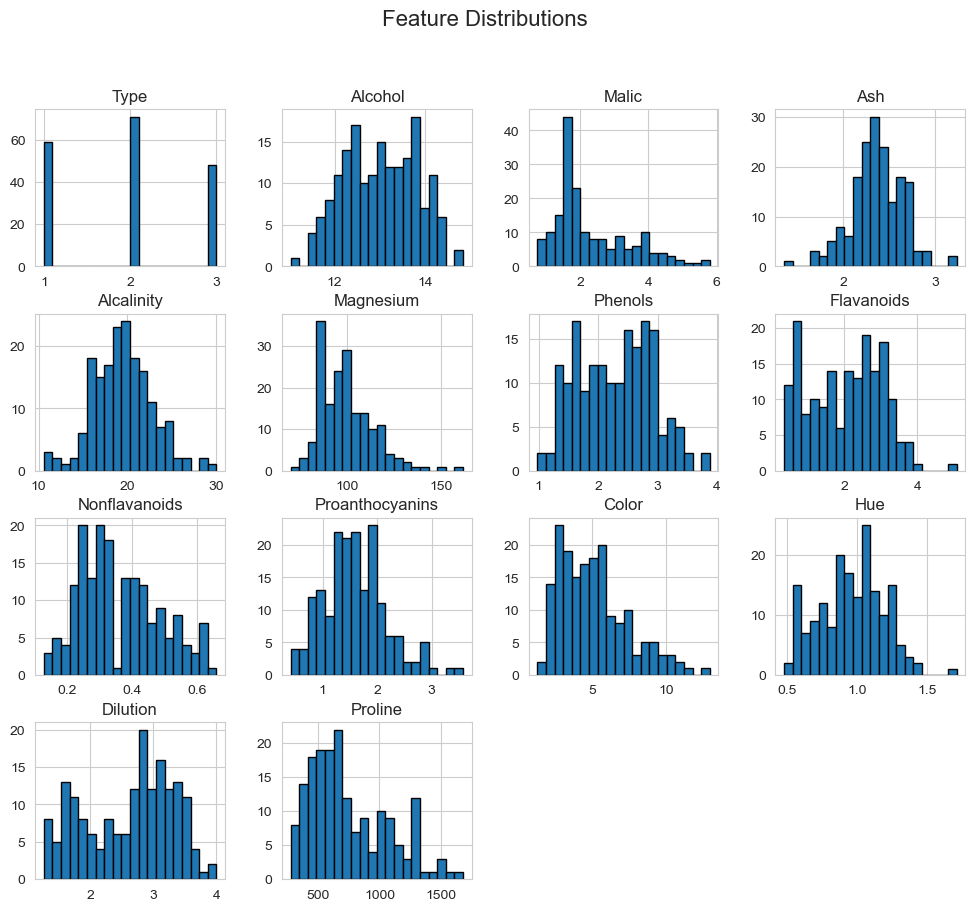

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


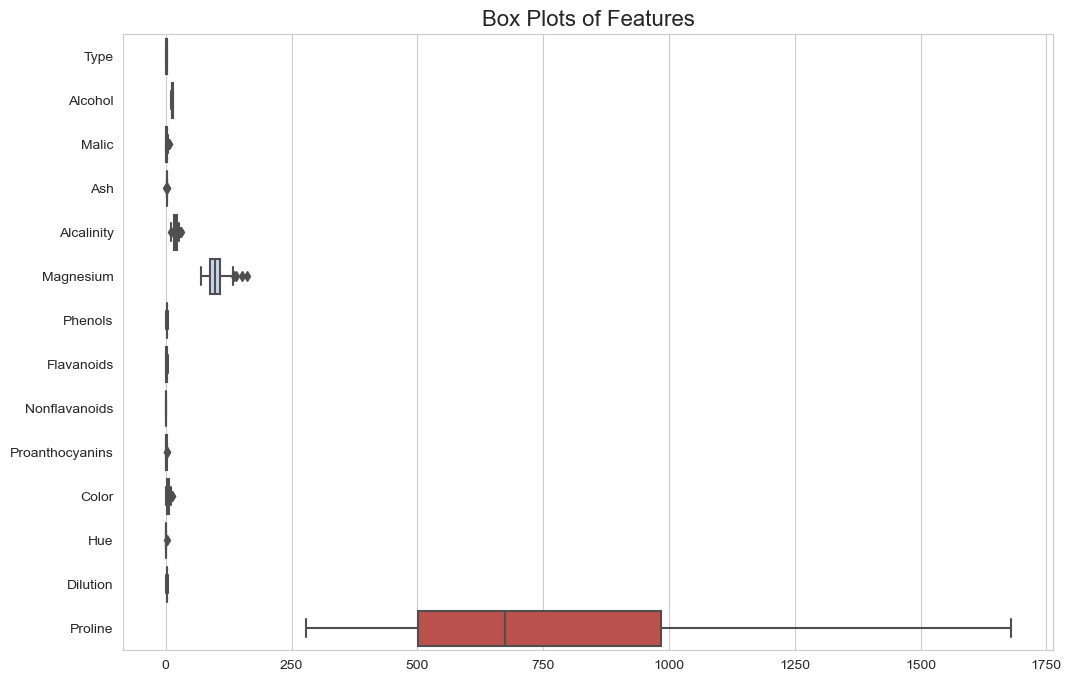

In [3]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Box Plots of Features", fontsize=16)
plt.show()


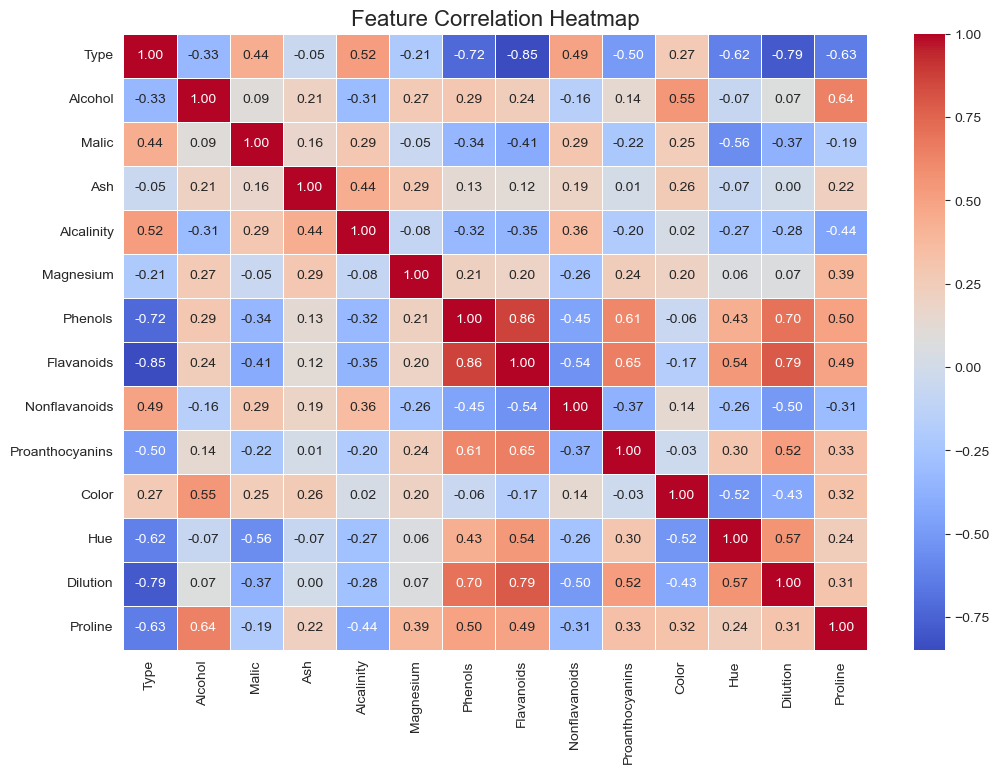

In [4]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


## Task 2: Dimensionality Reduction with PCA:
### 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
### 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
### 3.	Transform the original dataset into the principal components.


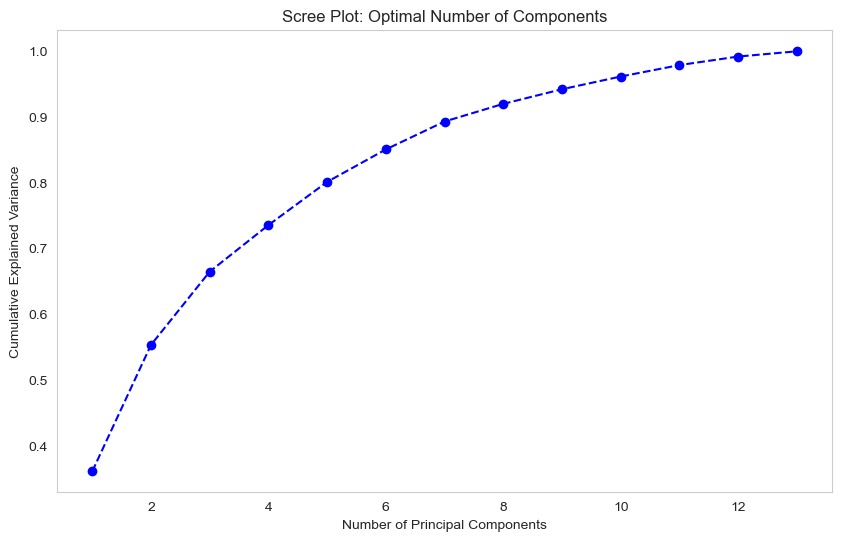

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = df.drop(columns=["Type"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA()
pca.fit(scaled_features)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot: Optimal Number of Components")
plt.grid()
plt.show()


In [6]:
optimal_components = np.argmax(explained_variance >= 0.90) + 1

pca_optimal = PCA(n_components=optimal_components)
principal_components = pca_optimal.fit_transform(scaled_features)

pca_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["Type"] = df["Type"]  

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,1


## Task 3: Clustering with Original Data:
### 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
### 2.	Visualize the clustering results using appropriate plots.
### 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

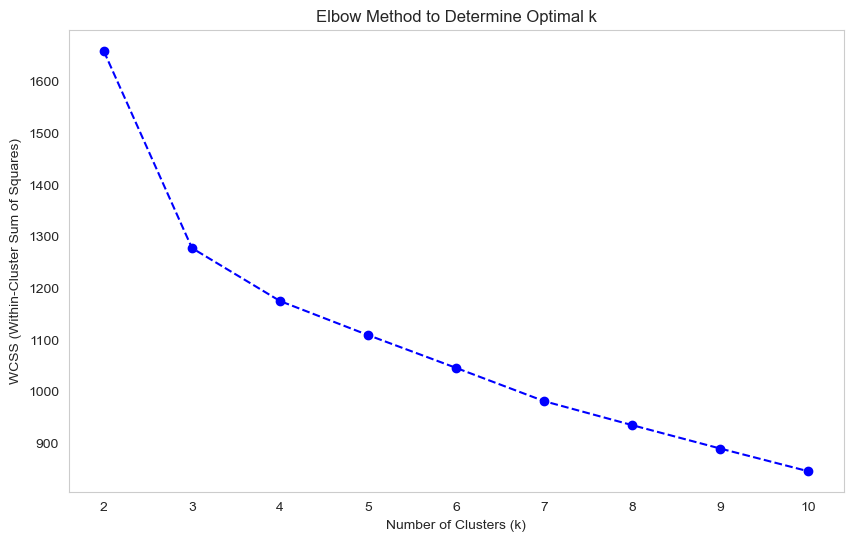

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

wcss = []  
cluster_range = range(2, 11)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid()
plt.show()


In [8]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

df["Cluster"] = cluster_labels

silhouette_avg = silhouette_score(scaled_features, cluster_labels)
davies_bouldin = davies_bouldin_score(scaled_features, cluster_labels)

silhouette_avg, davies_bouldin


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(0.2848589191898987, 1.3891879777181648)

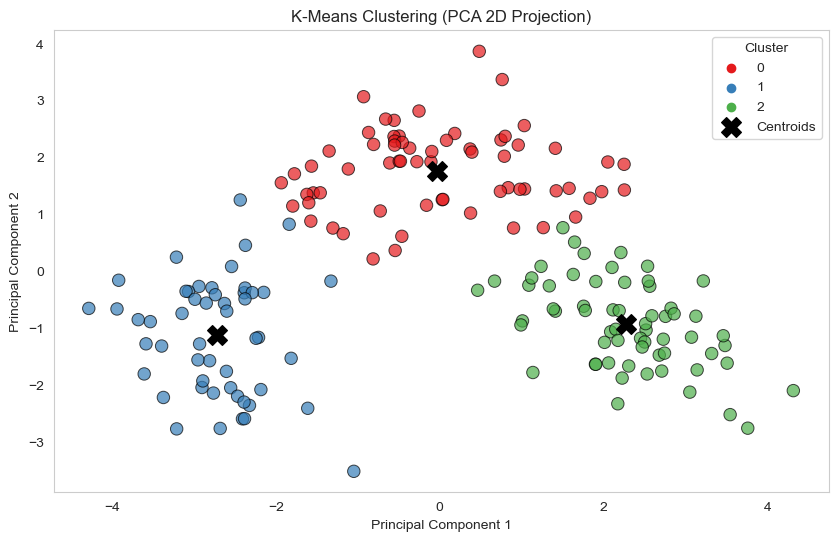

In [9]:
pca_2d = PCA(n_components=2)
pca_2d_transformed = pca_2d.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2d_transformed[:, 0], y=pca_2d_transformed[:, 1], 
                hue=df["Cluster"], palette="Set1", alpha=0.7, s=80, edgecolor="k")

centers_2d = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA 2D Projection)")
plt.legend(title="Cluster")
plt.grid()
plt.show()


## Task 4: Clustering with PCA Data:
### 1.	Apply the same clustering algorithm to the PCA-transformed dataset.
### 2.	Visualize the clustering results obtained from PCA-transformed data.
### 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [10]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_cluster_labels = kmeans_pca.fit_predict(principal_components)

pca_df["Cluster"] = pca_cluster_labels

silhouette_pca = silhouette_score(principal_components, pca_cluster_labels)
davies_bouldin_pca = davies_bouldin_score(principal_components, pca_cluster_labels)

comparison_metrics = {
    "Silhouette Score": {"Original Data": silhouette_avg, "PCA Data": silhouette_pca},
    "Davies–Bouldin Index": {"Original Data": davies_bouldin, "PCA Data": davies_bouldin_pca},
}

comparison_metrics


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'Silhouette Score': {'Original Data': 0.2848589191898987,
  'PCA Data': 0.3149696954705562},
 'Davies–Bouldin Index': {'Original Data': 1.3891879777181648,
  'PCA Data': 1.2668818314972172}}

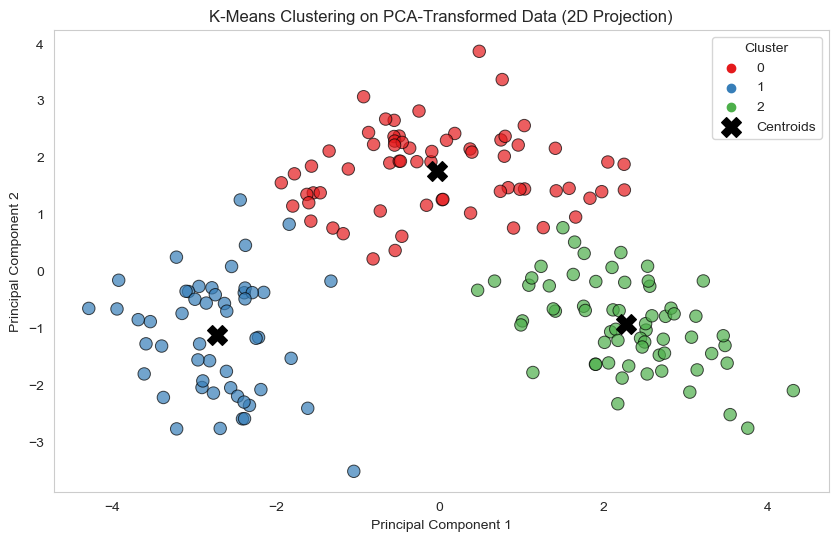

In [11]:
pca_2d_final = PCA(n_components=2)
pca_2d_final_transformed = pca_2d_final.fit_transform(principal_components)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2d_final_transformed[:, 0], y=pca_2d_final_transformed[:, 1], 
                hue=pca_df["Cluster"], palette="Set1", alpha=0.7, s=80, edgecolor="k")

centers_2d_final = pca_2d_final.transform(kmeans_pca.cluster_centers_)
plt.scatter(centers_2d_final[:, 0], centers_2d_final[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Transformed Data (2D Projection)")
plt.legend(title="Cluster")
plt.grid()
plt.show()


## Final Comparison:                  
### Silhouette Score	     
#### Original Data : 0.285	
#### PCA Data : 0.315 (Better)
### Davies–Bouldin Index  
#### Original Data :1.39
#### PCA Data : 1.27 (Lower = Better)

## Task 5: Comparison and Analysis:
### 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
### 2.	Discuss any similarities or differences observed in the clustering results.
### 3.	Reflect on the impact of dimensionality reduction on clustering performance.
### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


## 1. Comparing Clustering Results (Original vs. PCA-Transformed Data)
#### We used K-Means clustering on both the original dataset and the PCA-transformed dataset. Below is a comparison of their performance metrics:

#### Silhouette Score (Higher is better) 
#### Original Data : 0.285
#### PCA Data : 0.315 (Better)

#### Davies–Bouldin Index (Lower is better) 
#### Original Data : 1.39
#### PCA Data : 1.27 (Better)
#### The PCA-transformed data yielded a higher Silhouette Score (indicating better-defined clusters).
#### The Davies–Bouldin Index was lower, meaning the clusters were more compact and better separated in PCA space.

## 2. Observed Similarities and Differences
### Similarities:
#### In both cases, 3 clusters were formed, aligning with the fact that the dataset represents three types of wine.
#### Some overlapping regions existed in both approaches, especially between certain clusters.
### Differences:
#### Cluster Separation Improved in PCA Data: The PCA-transformed clustering showed clearer boundaries between clusters, whereas the original data clustering had some more overlap.
#### Reduced Noise in PCA Data: PCA removed redundant features, leading to more meaningful cluster formation.
#### Faster Computation in PCA Data: Since PCA reduced dimensionality (from 13 to 8 features), K-Means ran more efficiently on the PCA data.


## 3. Impact of Dimensionality Reduction on Clustering Performance
### Positive Impact of PCA on Clustering:
#### Better Cluster Separation: PCA helped reduce noise and captured the most important features, leading to better-defined clusters.
#### Improved Clustering Metrics: Higher Silhouette Score and lower Davies–Bouldin Index suggest PCA enhanced the clustering quality.
#### Faster Computation: K-Means worked more efficiently with 8 principal components than with 13 original features.

### Potential Downsides of PCA:
#### Loss of Interpretability: After PCA transformation, the new principal components are abstract and harder to interpret compared to the original wine properties.
#### Possible Information Loss: While PCA captures most of the variance, some small but meaningful information might be lost, which could affect fine-grained clustering.



## 4. Trade-offs Between Using PCA vs. Clustering on Original Data
### Interpretability	 
#### Original Data : Easier to interpret (uses real wine features)	
#### PCA-Transformed Data : Harder to interpret (abstract principal components)

## Clustering Quality
#### Original Data : Moderate
#### PCA-Transformed Data : Better separation & compact clusters

## Computational Efficiency
#### Original Data : Slower (high-dimensional data)
#### PCA-Transformed Data : Faster (reduced dimensions)

## Noise & Redundancy
#### Original Data :  May contain redundant features
#### PCA-Transformed Data : Reduces noise and keeps key information

## Performance Metrics
#### Original Data :  Lower Silhouette Score (0.285)
#### PCA-Transformed Data : Higher Silhouette Score (0.315)



## Task 6: Conclusion and Insights

### 1.	Summarize the key findings and insights from the assignment.
### 2.	Discuss the practical implications of using PCA and clustering in data analysis.
### 3.	Provide recommendations for when to use each technique based on the analysis conducted.


## 1. Key Findings and Insights
#### Through exploratory data analysis, PCA, and clustering, we discovered the following:

### Exploratory Data Analysis (EDA):
#### The dataset contained 13 numerical features and 3 wine classes.
#### Some features were highly correlated, indicating redundancy.

### Dimensionality Reduction (PCA):
#### 8 principal components captured over 90% of the variance in the dataset.
#### PCA helped remove noise and redundant features while retaining most of the information.

### Clustering (K-Means) on Original vs. PCA-Transformed Data:
#### Clustering on PCA data was more effective (higher Silhouette Score and lower Davies–Bouldin Index).
#### PCA improved cluster separation and computational efficiency but reduced interpretability.

### Comparison of Clustering Results:
#### PCA enhanced clustering performance, leading to more distinct, compact clusters.
#### Clustering on the original dataset retained interpretability but had slightly worse separation.

## 2. Practical Implications of PCA and Clustering in Data Analysis
### PCA is useful when dealing with high-dimensional data, where many features may be redundant or noisy. It helps in:
#### Reducing computation time for machine learning algorithms.
#### Improving clustering performance by focusing on the most important patterns.
#### Dealing with multicollinearity (correlated features).

### Clustering helps in discovering hidden patterns and can be used in:
#### Customer segmentation (e.g., grouping similar customers for marketing).
#### Anomaly detection (e.g., detecting fraud in transactions).
#### Medical diagnostics (e.g., categorizing diseases based on symptoms).

## 3.Recommendations: When to Use PCA and Clustering?
### High-dimensional data (many features)
#### Use PCA? : Yes
#### Use Clustering? : Yes
#### Reasoning : PCA reduces dimensionality, clustering finds patterns.

### Need for interpretability
#### Use PCA? :  No
#### Use Clustering? : Yes	
#### Reasoning : PCA components are abstract, but clustering on raw data is interpretable.

### Dealing with correlated features
#### Use PCA? : Yes	
#### Use Clustering? :Yes	
#### Reasoning : PCA removes redundancy, improving clustering.

### Small datasets (few features)
#### Use PCA? :  No
#### Use Clustering? :Yes	
#### Reasoning : PCA may not add much value if the dataset is already small.

### Finding natural groupings (e.g., customer segmentation)
#### Use PCA? : Yes	
#### Use Clustering? : Yes	
#### Reasoning : PCA helps if features are noisy; clustering finds groups.

### Real-time applications (fast processing needed)
#### Use PCA? : Yes	
#### Use Clustering? : Yes	
#### Reasoning : PCA speeds up computations for clustering models.












